# S&P 500 팩터 데이터 수집과 분석

<img src="https://i.imgur.com/tdpkZmM.png" >

### 이승준 plusjune@financedata.kr 
###  2019 FinanceData.KR

## FinanceDataReader
https://financedata.github.io/FinanceDataReader/

In [0]:
## FinanceDataReader 설치 (for 구글 Colab)

!pip install -q finance-datareader

In [0]:
import FinanceDataReader as fdr
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [0]:
# matplotlib 컬러맵 생성
import matplotlib as mpl
import numpy as np

def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

def make_explode(n):
    explodes = np.zeros(n)
    explodes[0] = 0.15
    return explodes

# S&P 500 종목 리스트

In [5]:
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
6,ADBE,Adobe Systems Inc,Information Technology,Application Software
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders


In [6]:
len(sp500)

505

## 팩터 데이터 - finviz.com 
EPS, P/E 등 72개 factor

https://finviz.com/quote.ashx?t=AAPL

<img src="https://i.imgur.com/3akddOs.png" >
    

## 팩터 데이터 수집
pandas.read_html(url)로 table 들을 읽어 옵니다.

읽은 table 중에서 8번째([7])를 읽어 옵니다.

```python
dfs = pd.read_html('https://finviz.com/quote.ashx?t=AAPL')
df = dfs[7]
```

위 실행에 문제가 있는 경우 몇 번째 테이블인지 확인해 봅니다. 페이지 구성 따라 [6]을 읽어야 하는 경우도 있습니다.

```python
df = dfs[6]
```

In [7]:
import pandas as pd

dfs = pd.read_html('https://finviz.com/quote.ashx?t=AAPL')
df = dfs[7]
df.columns = ['key', 'value'] * 6
df

,key,value,key,value,key,value,key,value,key,value,key,value
0,Index,DJIA S&P500,P/E,15.92,EPS (ttm),11.94,Insider Own,0.08%,Shs Outstand,4.81B,Perf Week,-0.58%
1,Market Cap,914.61B,Forward P/E,14.87,EPS next Y,12.77,Insider Trans,-5.95%,Shs Float,4.68B,Perf Month,9.70%
2,Income,58.33B,PEG,1.22,EPS next Q,2.36,Inst Own,61.00%,Short Float,2.07%,Perf Quarter,21.65%
3,Sales,261.61B,P/S,3.50,EPS this Y,32.60%,Inst Trans,-0.72%,Short Ratio,3.01,Perf Half Y,-13.82%
4,Book/sh,24.89,P/B,7.63,EPS next Y,12.09%,ROA,16.30%,Target Price,180.85,Perf Year,14.10%
5,Cash/sh,17.95,P/C,10.58,EPS next 5Y,13.00%,ROE,50.90%,52W Range,142.00 - 233.47,Perf YTD,20.42%
6,Dividend,2.92,P/FCF,19.04,EPS past 5Y,16.50%,ROI,26.60%,52W High,-18.64%,Beta,1.14
7,Dividend %,1.54%,Quick Ratio,1.30,Sales past 5Y,9.20%,Gross Margin,38.20%,52W Low,33.77%,ATR,3.64
8,Employees,132000,Current Ratio,1.30,Sales Q/Q,-4.50%,Oper. Margin,26.00%,RSI (14),65.80,Volatility,2.20% 1.93%
9,Optionable,Yes,Debt/Eq,0.97,EPS Q/Q,-4.80%,Profit Margin,22.70%,Rel Volume,0.73,Prev Close,188.72


## 컬럼을 행으로 만들기

In [8]:
df_list = [df.iloc[:, i*2: i*2+2] for i in range(6)]
df_factor = pd.concat(df_list, ignore_index=True)

df_factor.set_index('key', inplace=True)
df_factor.head(20)

,value
key,
Index,DJIA S&P500
Market Cap,914.61B
Income,58.33B
Sales,261.61B
Book/sh,24.89
Cash/sh,17.95
Dividend,2.92
Dividend %,1.54%
Employees,132000


In [9]:
df_factor.tail(10)

,value
key,
Perf Quarter,21.65%
Perf Half Y,-13.82%
Perf Year,14.10%
Perf YTD,20.42%
Beta,1.14
ATR,3.64
Volatility,2.20% 1.93%
Prev Close,188.72
Price,189.95


In [10]:
len(df_factor)

72

## 주요 팩터

* Market Cap
* Dividend yield
* PER
* PBR
* ROE
* Beta

In [11]:
v = df_factor.value

marcap = v['Market Cap']
dividend = v['Dividend %']
per = v['P/E']
pbr = v['P/B']
beta = v['Beta']
roe = v['ROE']

marcap, dividend, per, pbr, beta, roe 

('914.61B', '1.54%', '15.92', '7.63', '1.14', '50.90%')

## 데이터 전처리
1. 단위(B, M, K) 수치값으로 변환
1. '%' 삭제
1. float 타입 변환


In [0]:
import re

def _conv_to_float(s):
    if s[-1] == '%':
        s = s.replace('%', '')
    if s[-1] in list('BMK'):
        powers = {'B': 10 ** 9, 'M': 10 ** 6, 'K': 10 ** 3, '': 1}
        m = re.search("([0-9\.]+)(M|B|K|)", s)
        if m:
            val, mag = m.group(1), m.group(2)
            return float(val) * powers[mag]
    try:
        result = float(s)
    except:
        result = None
    return result

In [13]:
marcap = _conv_to_float(marcap)
dividend = _conv_to_float(dividend)
per = _conv_to_float(per)
pbr = _conv_to_float(pbr)
beta = _conv_to_float(beta)
roe = _conv_to_float(roe)

marcap, dividend, per, pbr, beta, roe  

(914610000000.0, 1.54, 15.92, 7.63, 1.14, 50.9)

## 팩터 크롤링, 함수로 정리하기

In [0]:
import pandas as pd
import re

## 데이터 전처리 변환
def _conv_to_float(s):
    if s[-1] == '%':
        s = s.replace('%', '')
    if s[-1] in list('BMK'):
        powers = {'B': 10 ** 9, 'M': 10 ** 6, 'K': 10 ** 3, '': 1}
        m = re.search("([0-9\.]+)(M|B|K|)", s)
        if m:
            val, mag = m.group(1), m.group(2)
            return float(val) * powers[mag]
    try:
        result = float(s)
    except:
        result = None
    return result

def stock_factors(sym):
    url = 'https://finviz.com/quote.ashx?t=' + sym
    df = pd.read_html(url)[7]
    df.columns = ['key', 'value'] * 6

    ## 컬럼을 행으로 만들기
    df_list = [df.iloc[:, i*2: i*2+2] for i in range(6)]
    df_factor = pd.concat(df_list, ignore_index=True)
    df_factor.set_index('key', inplace=True)

    v = df_factor.value
    marcap = _conv_to_float(v['Market Cap'])
    dividend = _conv_to_float(v['Dividend %'])
    per = _conv_to_float(v['P/E'])
    pbr = _conv_to_float(v['P/B'])
    beta = _conv_to_float(v['Beta'])
    roe = _conv_to_float(v['ROE'])

    return {'MarCap':marcap, 'Dividend':dividend, 'PER':per, 'PBR':pbr, 'Beta':beta, 'ROE':roe}

In [15]:
stock_factors('AAPL')

{'Beta': 1.14,
 'Dividend': 1.54,
 'MarCap': 914610000000.0,
 'PBR': 7.63,
 'PER': 15.92,
 'ROE': 50.9}

In [16]:
stock_factors('NFLX')

{'Beta': 1.38,
 'Dividend': None,
 'MarCap': 162940000000.0,
 'PBR': 29.71,
 'PER': 136.09,
 'ROE': 25.8}

## 전종목 팩터 데이터 수집과 저장(JSON)

In [0]:
# 디렉토리가 없으면 생성
import os

folder = "sp500_factors/"

if not os.path.isdir(folder):
    os.mkdir(folder)

In [18]:
import json
import pandas as pd

re_map_sym = {'BRKB': 'BRK-B', 'BR': 'BRK-A', 'BFB':'BF-B'}

for ix, row in sp500[:10].iterrows(): # 종목 10개만 진행해 봅니다.
    sym, name = row['Symbol'], row['Name']
    json_fn = folder + '%s.json' % (sym)
    if os.path.exists(json_fn):
        print('skip', json_fn)
        continue

    if sym in re_map_sym:
        sym = re_map_sym[sym]
    factors = stock_factors(sym)
    with open(json_fn, 'w') as f:
        json.dump(factors, f)
    print(sym, name)

MMM 3M Company
ABT Abbott Laboratories
ABBV AbbVie Inc.
ABMD ABIOMED Inc
ACN Accenture plc
ATVI Activision Blizzard
ADBE Adobe Systems Inc
AMD Advanced Micro Devices Inc
AAP Advance Auto Parts
AES AES Corp


In [19]:
# 이하는 미리 받아둔 데이터로 진행 합니다.

!curl -L -o sp500_factors.zip "https://www.dropbox.com/s/43g1uosf4s505ks/sp500_factors_20190317.zip?dl=0"
!unzip -q -o sp500_factors.zip     

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1034    0  1034    0     0   1534      0 --:--:-- --:--:-- --:--:--  1534
100  137k  100  137k    0     0   135k      0  0:00:01  0:00:01 --:--:--  135k


## JSON 팩터 데이터 읽기

In [0]:
# JSON 팩터 데이터 읽기
for ix, row in sp500.iterrows():
    sym, name = row['Symbol'], row['Name']
    json_fn = folder + '%s.json' % (sym)

    with open(json_fn, 'r') as f:
        factors = json.load(f)
        
        for f in ['MarCap', 'Dividend', 'PER', 'PBR', 'Beta', 'ROE']:
            sp500.loc[ix,f] = factors[f]

In [21]:
sp500.head(20)

,Symbol,Name,Sector,Industry,MarCap,Dividend,PER,PBR,Beta,ROE
0,MMM,3M Company,Industrials,Industrial Conglomerates,120830000000.00,2.77,22.64,12.33,1.05,51.70
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,140580000000.00,1.60,57.62,4.61,1.13,7.70
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,121000000000.00,5.26,22.37,nan,1.15,-202.20
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,15180000000.00,nan,69.51,17.63,0.39,29.00
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,106170000000.00,1.75,24.53,8.38,1.10,39.60
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,34140000000.00,0.83,18.96,3.01,0.83,17.20
6,ADBE,Adobe Systems Inc,Information Technology,Application Software,126100000000.00,nan,46.07,13.41,1.11,29.10
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors,23490000000.00,nan,72.55,18.34,3.41,33.80
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,11270000000.00,0.15,27.38,3.18,1.01,11.80
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders,12110000000.00,3.00,11.88,3.80,1.06,37.00


## 섹터별 종목수

In [22]:
sector_count = sp500.groupby('Sector')['Symbol'].count().sort_values(ascending=False)
sector_count

Sector
Industrials               70
Financials                70
Information Technology    66
Consumer Discretionary    64
Health Care               62
Consumer Staples          33
Real Estate               31
Energy                    29
Utilities                 28
Materials                 26
Communication Services    26
Name: Symbol, dtype: int64

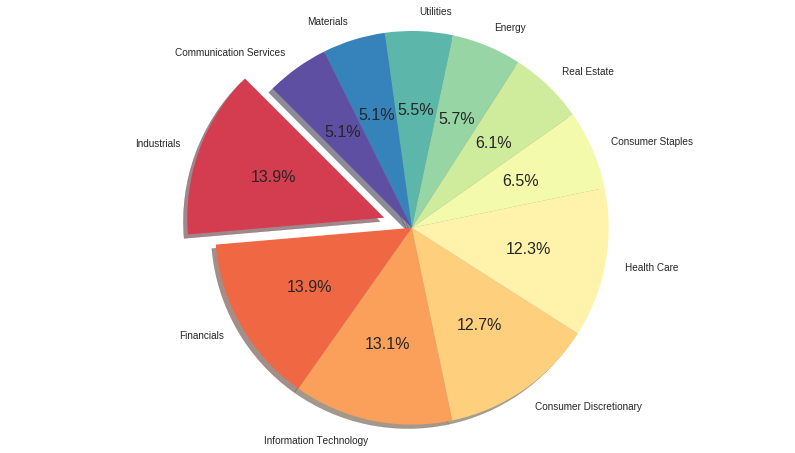

In [23]:
# sector_count 섹터별 종목수
values = sector_count.values
labels = sector_count.index

n = len(labels)
plt.pie(values, labels=labels, colors=make_colors(n), explode=make_explode(n), autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.show()

## 섹터별 시가총액

In [24]:
sector_marcap = sp500.groupby('Sector')['MarCap'].sum().sort_values(ascending=False)
sector_marcap

Sector
Information Technology   4584440000000.00
Financials               3933790000000.00
Health Care              3557080000000.00
Communication Services   3473360000000.00
Consumer Discretionary   2581990000000.00
Industrials              2336640000000.00
Consumer Staples         1984570000000.00
Energy                   1325930000000.00
Utilities                 786520000000.00
Real Estate               705140000000.00
Materials                 659880000000.00
Name: MarCap, dtype: float64

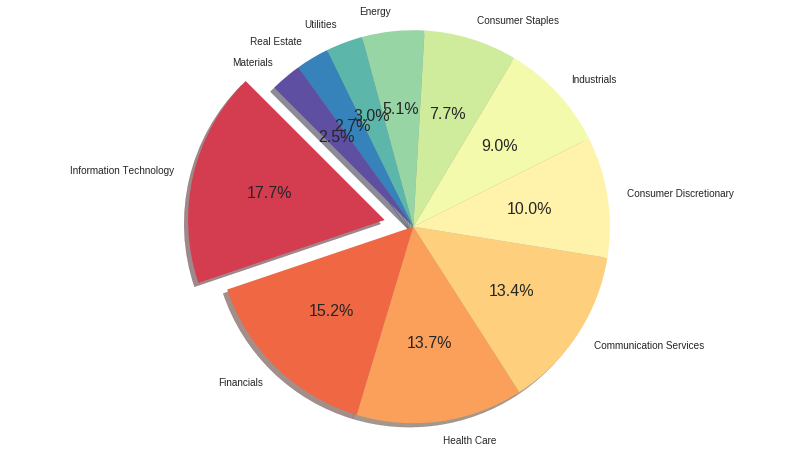

In [25]:
# sector_marcap 시가총액
values = sector_marcap.values
labels = sector_marcap.index

n = len(labels)

plt.pie(values, labels=labels, colors=make_colors(n), explode=make_explode(n), autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.show()

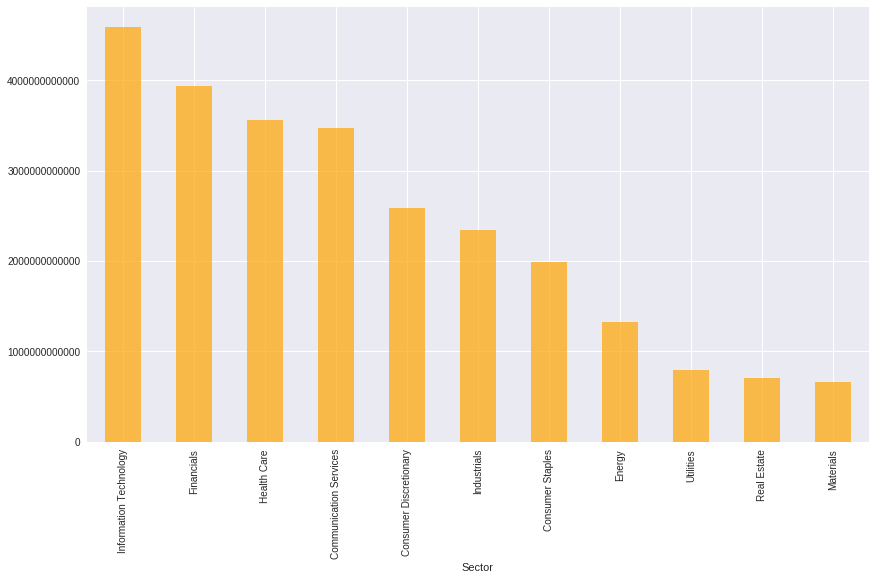

In [26]:
_ = sector_marcap.plot(kind='bar', color='orange', alpha=0.7)

## 섹터별 팩터 분석

In [27]:
sp500.groupby('Sector').describe()['PER'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Consumer Discretionary,59.00,210.22,1442.94,6.65,12.87,19.11,23.23,11105.00
Health Care,55.00,68.54,235.01,8.97,18.70,31.26,47.51,1767.40
Real Estate,31.00,63.20,98.27,11.70,27.49,40.37,63.66,573.42
Information Technology,65.00,40.50,54.81,3.29,16.70,26.80,39.93,400.34
Communication Services,23.00,27.22,28.60,6.94,11.87,18.96,28.32,137.96
Utilities,26.00,23.96,6.82,11.88,20.56,22.80,25.47,41.86
Energy,23.00,23.27,26.43,8.23,11.98,15.32,24.41,137.19
Materials,26.00,22.60,11.67,7.24,12.38,22.18,28.81,54.15
Consumer Staples,30.00,22.49,8.73,7.39,14.45,22.13,28.68,43.70


In [28]:
sp500[sp500['Sector']=='Consumer Discretionary'].sort_values(by='PER', ascending=False)[:10]

,Symbol,Name,Sector,Industry,MarCap,Dividend,PER,PBR,Beta,ROE
457,UAA,Under Armour Class A,Consumer Discretionary,"Apparel, Accessories & Luxury Goods",9510000000.00,nan,11105.00,4.91,0.44,-2.30
109,CMG,Chipotle Mexican Grill,Consumer Discretionary,Restaurants,17480000000.00,nan,105.03,12.31,0.64,12.50
28,AMZN,Amazon.com Inc.,Consumer Discretionary,Internet & Direct Marketing Retail,843780000000.00,nan,86.33,19.27,1.63,27.00
496,WYNN,Wynn Resorts Ltd,Consumer Discretionary,Casinos & Gaming,12370000000.00,2.59,73.85,6.13,1.69,36.60
185,EXPE,Expedia Group,Consumer Discretionary,Internet & Direct Marketing Retail,18160000000.00,1.05,45.98,4.40,0.95,9.80
228,HAS,Hasbro Inc.,Consumer Discretionary,Leisure Products,10870000000.00,3.14,42.57,6.26,0.89,12.60
345,NKE,Nike,Consumer Discretionary,"Apparel, Accessories & Luxury Goods",137350000000.00,1.01,33.77,15.72,0.68,23.10
236,HLT,Hilton Worldwide Holdings Inc,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",25260000000.00,0.70,33.58,45.62,1.17,89.30
319,MGM,MGM Resorts International,Consumer Discretionary,Casinos & Gaming,13940000000.00,2.00,32.73,2.11,1.40,6.50
423,SBUX,Starbucks Corp.,Consumer Discretionary,Restaurants,89470000000.00,2.04,31.12,nan,0.49,173.40


Outlier: UAA(언더 아머) - 스포츠 용품 브랜드, 기어라는 기능성 소재로 유명

In [29]:
sp500.groupby('Sector').describe()['PBR'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Industrials,67.00,15.81,78.14,1.55,2.77,4.31,6.43,642.36
Consumer Discretionary,58.00,9.95,23.16,0.93,2.13,4.17,6.89,157.09
Information Technology,61.00,7.99,5.72,1.23,3.66,6.57,11.39,24.49
Consumer Staples,29.00,6.95,6.32,0.60,2.32,4.83,9.19,27.75
Health Care,59.00,6.08,5.32,0.78,2.63,4.25,7.37,29.99
Financials,68.00,4.83,13.81,0.00,1.13,1.54,2.27,80.63
Communication Services,26.00,4.35,5.55,0.57,1.88,3.21,4.79,30.12
Real Estate,30.00,4.04,3.59,1.34,2.06,2.74,4.43,16.74
Materials,25.00,3.72,2.65,0.82,1.89,2.86,4.45,10.70


In [30]:
sp500.groupby('Sector').describe()['ROE'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Industrials,68.00,33.48,101.17,-215.10,13.02,24.55,32.02,785.10
Consumer Discretionary,62.00,33.23,92.78,-100.30,12.27,22.75,34.07,609.20
Financials,66.00,28.94,69.19,0.00,9.40,12.00,15.93,402.10
Communication Services,22.00,23.31,20.56,-13.90,12.47,20.10,27.58,82.80
Information Technology,64.00,21.03,58.14,-274.60,11.07,25.55,42.45,172.20
Materials,26.00,16.45,18.24,-50.10,8.88,17.30,27.25,45.40
Health Care,59.00,16.32,38.52,-202.20,6.95,16.20,25.80,95.10
Real Estate,31.00,12.49,14.33,-1.60,4.65,8.00,16.25,72.80
Energy,28.00,11.83,9.83,-3.30,3.63,11.00,18.75,34.90


In [31]:
sp500.groupby('Sector').describe()['Beta'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Energy,28.00,1.28,0.41,0.60,0.98,1.21,1.41,2.26
Materials,24.00,1.25,0.46,0.04,0.90,1.23,1.54,2.28
Information Technology,66.00,1.23,0.43,0.55,0.97,1.17,1.41,3.41
Industrials,69.00,1.20,0.31,0.47,1.02,1.20,1.37,2.52
Financials,67.00,1.17,0.35,0.34,0.97,1.16,1.44,2.04
Health Care,62.00,1.11,0.40,0.32,0.89,1.11,1.25,3.11
Communication Services,22.00,1.06,0.33,0.49,0.84,1.06,1.37,1.58
Consumer Discretionary,63.00,1.00,0.41,0.11,0.68,1.02,1.27,1.90
Real Estate,31.00,0.71,0.33,0.19,0.48,0.63,0.88,1.71


In [32]:
sp500.groupby('Sector').describe()['Dividend'].sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Real Estate,29.00,3.79,1.28,1.78,2.89,3.60,4.18,7.04
Utilities,28.00,3.15,0.91,0.29,2.87,3.06,3.70,5.04
Communication Services,14.00,2.86,2.29,0.69,1.52,1.83,3.96,8.27
Consumer Staples,32.00,2.84,1.22,0.98,2.10,2.66,3.57,5.64
Consumer Discretionary,50.00,2.73,1.74,0.14,1.52,2.54,3.51,8.91
Energy,29.00,2.65,1.59,0.35,1.16,2.57,4.03,5.52
Financials,66.00,2.38,1.07,0.52,1.62,2.44,2.99,6.07
Materials,26.00,2.32,1.31,0.35,1.46,2.02,2.78,5.33
Information Technology,45.00,2.16,1.17,0.03,1.36,1.97,2.80,5.29


###  2019 FinanceData.KR